
# Dual‑Image Histogram Viewer (Grayscale **and** RGB)

This notebook lets you quickly compare two images:

* **Grayscale overlay histogram** (single chart)  
* **RGB channel histograms** – three sub‑plots (Red, Green, Blue) with both images overlaid


In [2]:

%matplotlib inline
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True


In [3]:

def load_image(path_or_img, mode='RGB'):
    """Load an image and convert to requested mode (default RGB)."""
    if isinstance(path_or_img, Image.Image):
        return path_or_img.convert(mode)
    return Image.open(Path(path_or_img)).convert(mode)


In [4]:

def plot_grayscale_histograms(img1, img2, labels=('Image 1', 'Image 2')):
    """Overlay grayscale histograms of two images."""
    im1 = load_image(img1, mode='L')
    im2 = load_image(img2, mode='L')
    data1 = np.array(im1).ravel()
    data2 = np.array(im2).ravel()
    
    bins = np.arange(257)
    plt.figure()
    plt.hist(data1, bins=bins, alpha=0.5, label=labels[0], density=True, histtype='stepfilled')
    plt.hist(data2, bins=bins, alpha=0.5, label=labels[1], density=True, histtype='stepfilled')
    plt.xlabel('Pixel intensity (0-255)')
    plt.ylabel('Normalized frequency')
    plt.title('Grayscale Histogram Overlay')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [5]:

def plot_rgb_histograms(img1, img2, labels=('Image 1', 'Image 2')):
    """Plot overlaid histograms for each RGB channel (three subplots)."""
    im1 = np.array(load_image(img1, mode='RGB'))
    im2 = np.array(load_image(img2, mode='RGB'))
    
    channel_names = ['Red', 'Green', 'Blue']
    bins = np.arange(257)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    for c in range(3):
        ax = axes[c]
        ax.hist(im1[..., c].ravel(), bins=bins, alpha=0.5,
                label=f"{labels[0]}", density=True, histtype='stepfilled')
        ax.hist(im2[..., c].ravel(), bins=bins, alpha=0.5,
                label=f"{labels[1]}", density=True, histtype='stepfilled')
        ax.set_title(f"{channel_names[c]} Channel")
        ax.set_xlabel('Pixel intensity')
        ax.set_ylabel('Normalized freq')
        ax.legend()
    plt.tight_layout()
    plt.show()


In [6]:

def plot_rgb_histogram(img1, label='Image'):
    """Plot overlaid histograms for each RGB channel (three subplots)."""
    im1 = np.array(load_image(img1, mode='RGB'))
    
    channel_names = ['Rot', 'Grün', 'Blau']
    bins = np.arange(257)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    for c in range(3):
        ax = axes[c]
        ax.hist(im1[..., c].ravel(), bins=bins, alpha=0.5,
                label=f"{label}", density=True, histtype='stepfilled')
        ax.set_title(f"{channel_names[c]}kanal")
        ax.set_xlabel('Pixelintensität (0-255)')
        ax.set_ylabel('Normalisierte Frequenz')
        ax.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_rgb_histograms3(img1, img2, img3, labels=('Image 1', 'Image 2', 'Image 3')):
    """Plot overlaid histograms for each RGB channel (three subplots)."""
    im1 = np.array(load_image(img1, mode='RGB'))
    im2 = np.array(load_image(img2, mode='RGB'))
    im3 = np.array(load_image(img3, mode='RGB'))
    
    channel_names = ['Red', 'Green', 'Blue']
    bins = np.arange(257)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    for c in range(3):
        ax = axes[c]
        ax.hist(im1[..., c].ravel(), bins=bins, alpha=0.5, label=f"{labels[0]}", density=True, histtype='stepfilled')
        ax.hist(im2[..., c].ravel(), bins=bins, alpha=0.5, label=f"{labels[1]}", density=True, histtype='stepfilled')
        ax.hist(im3[..., c].ravel(), bins=bins, alpha=0.5, label=f"{labels[2]}", density=True, histtype='stepfilled')
        ax.set_title(f"{channel_names[c]} Channel")
        ax.set_xlabel('Pixel intensity')
        ax.set_ylabel('Normalized freq')
        ax.legend()
    plt.tight_layout()
    plt.show()

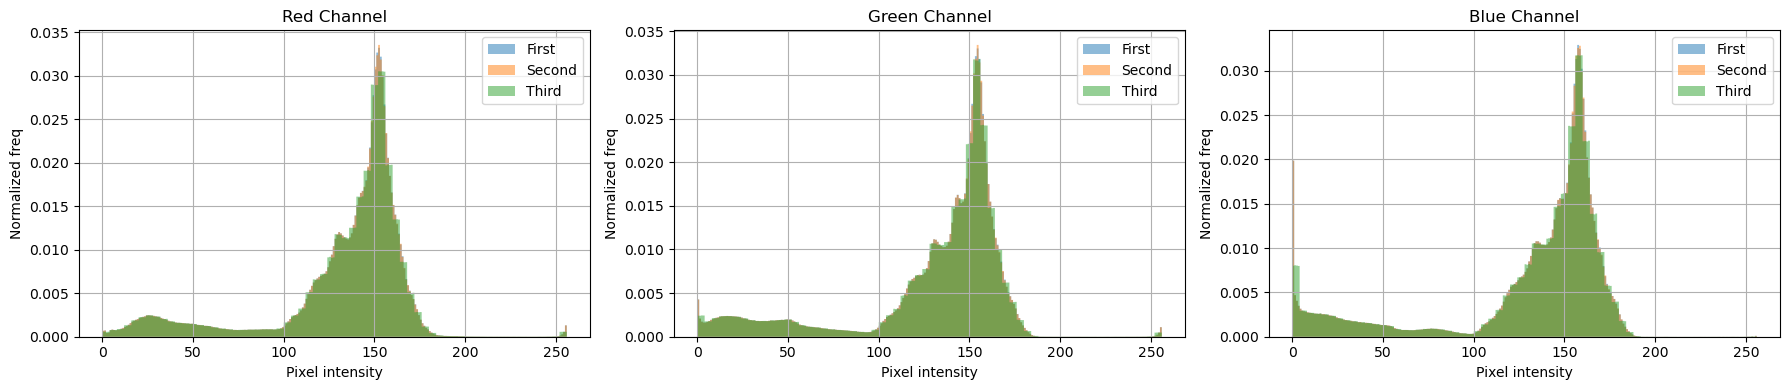

In [13]:
# img1_path = "examples/input/dhbw_logo.png"
# img2_path = "examples/output/dhbw_lsb.png"
# img3_path = "examples/output/dhbw_key.png"

img1_path = "examples/input/baden.png"
img2_path = "examples/output/baden_lsb.png"
img3_path = "examples/output/baden_stegacrypt_2.png"

# Grayscale
# plot_grayscale_histograms(img1_path, img2_path, labels=('First', 'Second'))

# RGB
# plot_rgb_histogram(img1_path, label='Bild')
# plot_rgb_histograms(img1_path, img2_path, labels=('First', 'Second'))
plot_rgb_histograms3(img1_path, img2_path, img3_path, labels=('First', 'Second', 'Third'))


## Quick Start

```python
img1_path = "first_image.jpg"
img2_path = "second_image.png"

# Grayscale
plot_grayscale_histograms(img1_path, img2_path, labels=('First', 'Second'))

# RGB
plot_rgb_histograms(img1_path, img2_path, labels=('First', 'Second'))
```
